# Decision Trees and Random Forests
**Problem Statement** <br>
Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output <br><br>
INPUTS: <br>
Age: in months <br>
Number: the number of vertebrae involved <br>
Start: the number of the first (topmost) vertebra operated on. <br>

OUTPUTS:<br>
Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [4]:
df["Kyphosis"].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

In [7]:
df.corr(numeric_only=True)

Age    Number     Start
Age     1.000000 -0.016687  0.057828
Number -0.016687  1.000000 -0.425099
Start   0.057828 -0.425099  1.000000

## EDA

We'll just check out a simple pairplot for this small dataset.

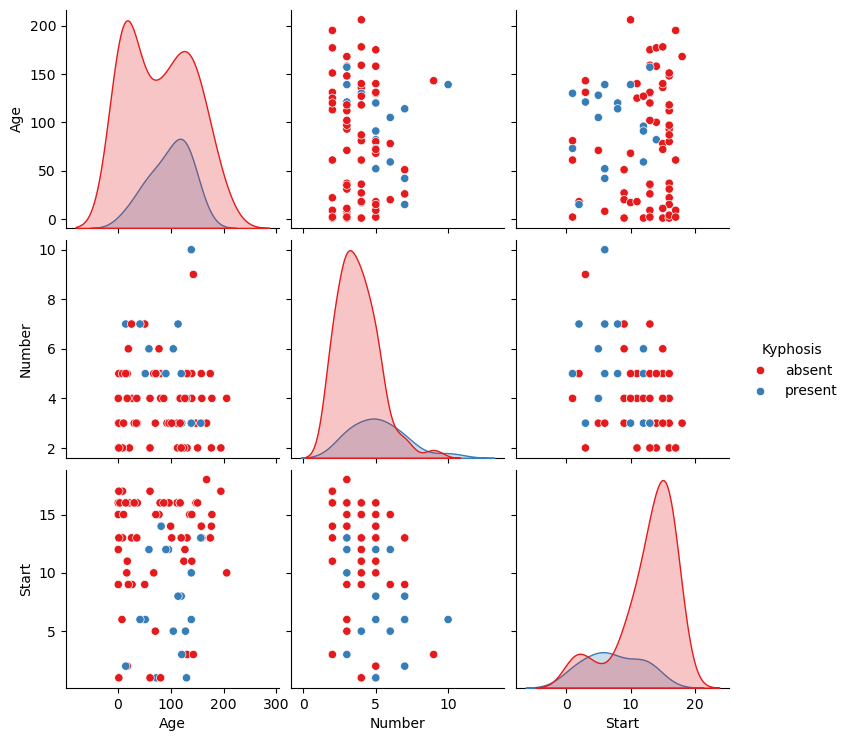

In [8]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier(criterion="entropy")

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.70      0.88      0.78        16
     present       0.60      0.33      0.43         9

    accuracy                           0.68        25
   macro avg       0.65      0.60      0.60        25
weighted avg       0.66      0.68      0.65        25



In [18]:
print(confusion_matrix(y_test,predictions))

[[14  2]
 [ 6  3]]


In [19]:
dtree.feature_importances_

array([0.47635946, 0.10972136, 0.41391918])

In [20]:
df.columns[1:]

Index(['Age', 'Number', 'Start'], dtype='object')

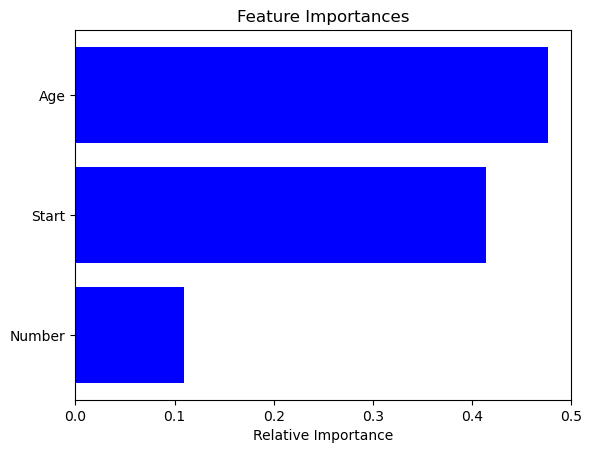

In [21]:
sorted_idx = dtree.feature_importances_.argsort()
plt.title('Feature Importances')
plt.barh(range(len(sorted_idx)), dtree.feature_importances_[sorted_idx], color='b', align='center')
plt.yticks(range(len(sorted_idx)), [df.columns[1:][i] for i in sorted_idx])
plt.xlabel('Relative Importance')
plt.show()

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [22]:
from IPython.display import Image  
from six import StringIO 
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

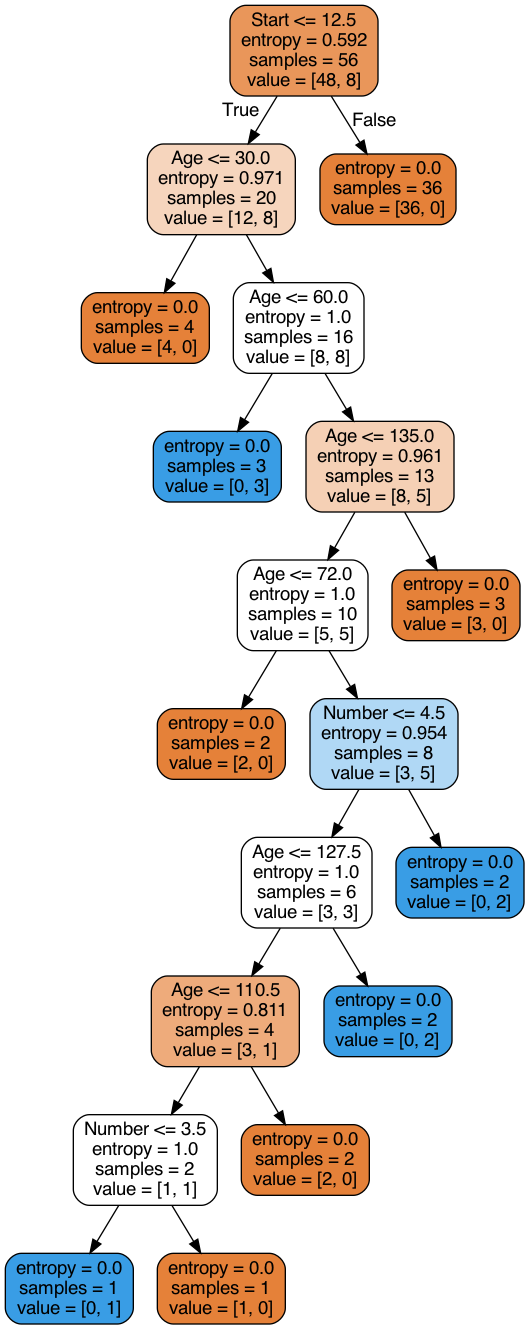

In [23]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
rfc.feature_importances_[sorted_idx]

array([0.24046334, 0.37635508, 0.38318158])

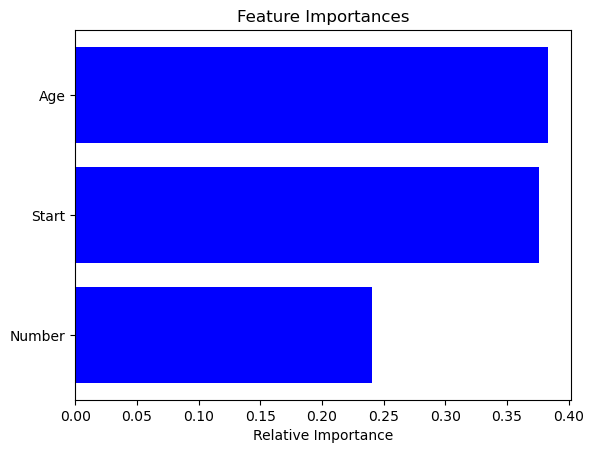

In [27]:
sorted_idx = rfc.feature_importances_.argsort()
plt.title('Feature Importances')
plt.barh(range(len(sorted_idx)), rfc.feature_importances_[sorted_idx], color='b', align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
# Feature importances
# https://medium.com/@soumendu1995/understanding-feature-importance-using-random-forest-classifier-algorithm-1fb96f2ff8a4

In [29]:
print(confusion_matrix(y_test,rfc_pred))

[[14  2]
 [ 7  2]]


In [30]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.67      0.88      0.76        16
     present       0.50      0.22      0.31         9

    accuracy                           0.64        25
   macro avg       0.58      0.55      0.53        25
weighted avg       0.61      0.64      0.60        25



# Great Job!